<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Bank_churn <br>(Day1 and Day 2)
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score,auc,classification_report,roc_auc_score,roc_curve,confusion_matrix,log_loss,cohen_kappa_score,accuracy_score
from sklearn.linear_model import LogisticRegression

#### Read the data

Load the csv file and print the first five observations.

In [2]:
df=pd.read_csv('bank_churn.csv')
df.head()

,CreditScore,Geography,Gender,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
0,619,France,Female,42,2,0.00,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,0
2,502,France,Female,42,8,159660.80,3,1,1
3,699,France,Female,39,1,0.00,2,0,0
4,850,Spain,Female,43,2,125510.82,1,1,0


In [3]:
df.shape

(9920, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CreditScore       9920 non-null   int64  
 1   Geography         9920 non-null   object 
 2   Gender            9920 non-null   object 
 3   Age               9920 non-null   int64  
 4   NumOfYrsWithBank  9920 non-null   int64  
 5   Balance           9920 non-null   float64
 6   NumOfProducts     9920 non-null   int64  
 7   HasCrCard         9920 non-null   int64  
 8   Closed_Acc        9920 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 697.6+ KB


In [5]:
df.describe()

,CreditScore,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
count,9920.000000,9920.000000,9920.000000,9920.000000,9920.000000,9920.000000,9920.000000
mean,650.804536,38.768347,5.006351,76477.336143,1.529940,0.705847,0.203831
std,96.119083,10.129247,2.890735,62407.729207,0.581073,0.455684,0.402865
min,382.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97221.520000,1.000000,1.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,0.000000
max,850.000000,75.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


In [6]:
df.describe(include=object)

,Geography,Gender
count,9920,9920
unique,3,2
top,France,Male
freq,4972,5414


In [7]:
df.isnull().sum()

CreditScore         0
Geography           0
Gender              0
Age                 0
NumOfYrsWithBank    0
Balance             0
NumOfProducts       0
HasCrCard           0
Closed_Acc          0
dtype: int64

In [8]:
df_cat = df.select_dtypes(include=object)

for i in df_cat.columns:
     dummy = pd.get_dummies(df[i],drop_first=True)
        df = pd.concat([df,dummy],axis=1)
        
df.drop(['Geography','Gender'],axis=1,inplace=True)
df.head()

,CreditScore,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,0,0,0
1,608,41,1,83807.86,1,0,0,0,1,0
2,502,42,8,159660.80,3,1,1,0,0,0
3,699,39,1,0.00,2,0,0,0,0,0
4,850,43,2,125510.82,1,1,0,0,1,0


Our objective is to predict whether the customer has closed the bank account or not.

**The data definition is as follows:** <br>

**CreditScore**: Credit score of the customer 

**Geography**: Resident country of the customer

**Gender**: Gender of the customer

**Age**: Age of the customer

**NumOfYrsWithBank**: Years for which the customer has been with the bank

**Balance**: Bank balance of the customer in Euro

**NumOfProducts**: Number of bank facilities for which customer has opted

**HasCrCard**: Whether the customer has credit card or not (1 = Yes, 0 = No)

**Closed_Acc**: Whether the customer has closed the bank account or not (1 = Yes, 0 = No) (target/dependent variable)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the target variable imbalanced? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

0    7898
1    2022
Name: Closed_Acc, dtype: int64


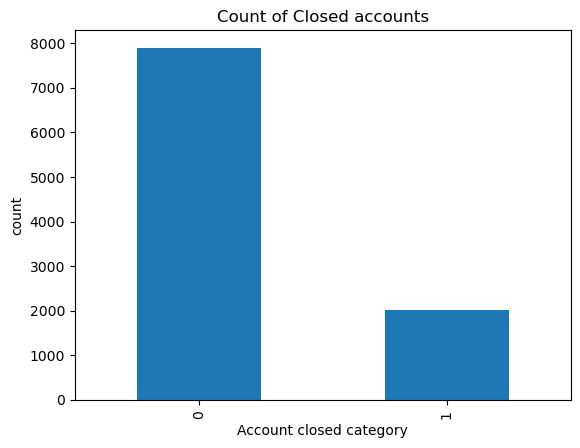

In [9]:
a=df['Closed_Acc'].value_counts()
print(a)
a.plot(kind='bar')
plt.ylabel('count')
plt.xlabel('Account closed category')
plt.title('Count of Closed accounts')
plt.show()

- We can observe that there is a class imbalance in data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full logistic model and calculate the odds for each variable (consider the probability  threshold as 0.25)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
from sklearn.preprocessing import StandardScaler
X = df.drop('Closed_Acc',axis=1)
y =df['Closed_Acc']

ss= StandardScaler()
X = pd.DataFrame(ss.fit_transform(X),columns=X.columns)

X_c = sm.add_constant(X)

X_train,X_test,y_train,y_test = train_test_split(X_c,y, test_size=0.3, random_state=100)
Logit_model = sm.Logit(y_train,X_train).fit()
Logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.442552
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Closed_Acc   No. Observations:                 6944
Model:                          Logit   Df Residuals:                     6934
Method:                           MLE   Df Model:                            9
Date:                Sun, 07 Jan 2024   Pseudo R-squ.:                  0.1281
Time:                        11:03:05   Log-Likelihood:                -3073.1
converged:                       True   LL-Null:                       -3524.4
Covariance Type:            nonrobust   LLR p-value:                1.680e-188
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.5755      0.035    -44.931      0.000      -1.644      -1.507
CreditScore         -0.0564      0.032     -1.756      0.079      -0.119       0.007
Age                  0.7341      0.031     23.521      0.000       0.673       0.795
NumOfYrsWithBank    -0.0306      0.032     -0.966      0.334      -0.093       0.032
Balance              0.1489      0.038      3.912      0.000       0.074       0.223
NumOfProducts       -0.0942      0.033     -2.889      0.004      -0.158      -0.030
HasCrCard            0.0378      0.032      1.163      0.245      -0.026       0.101
Germany              0.3299      0.035      9.530      0.000       0.262       0.398
Spain                0.0322      0.036      0.896      0.370      -0.038       0.103
Male                -0.2710      0.032     -8.453      0.000      -0.334      -0.208
====================================================================================
"""

In [11]:
print('odds for each variable are as foloows:')
np.exp(Logit_model.params[1:])

odds for each variable are as foloows:


CreditScore         0.945168
Age                 2.083660
NumOfYrsWithBank    0.969837
Balance             1.160528
NumOfProducts       0.910091
HasCrCard           1.038502
Germany             1.390869
Spain               1.032701
Male                0.762619
dtype: float64

In [12]:
y_pred_prob = Logit_model.predict(X_test)
y_pred_prob.head()

113     0.193544
3857    0.294445
4066    0.063959
7578    0.138901
4695    0.423101
dtype: float64

In [13]:
y_pred = [1 if i > 0.25 else 0 for i in y_pred_prob]
y_pred[:5]

[0, 1, 0, 0, 1]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Calculate the Specificity and Sensitivity from the confusion matrix of the full model (consider the probability threshold as 0.25)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

[[1907  472]
 [ 258  339]]
1907 258 339 472 

Specificity: 0.8015973097940311
Sensitivity: 0.5678391959798995


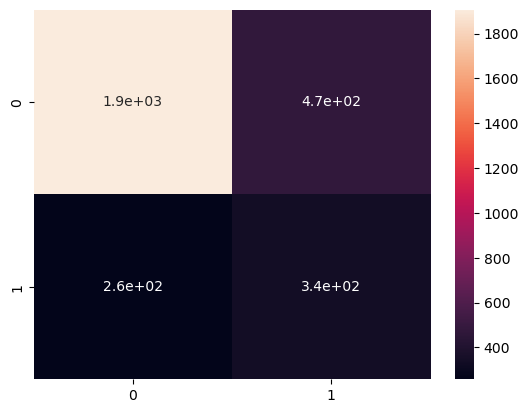

In [14]:
mat=confusion_matrix(y_test,y_pred)
print(mat)
sns.heatmap(mat,annot=True)

TN = mat[0][0]
TP = mat[1][1]
FN = mat[1][0]
FP = mat[0][1]
print(TN,FN,TP,FP,'\n')

print('Specificity:', TN/(TN+FP))
print('Sensitivity:', TP/(TP+FN))

In [16]:
s= TP/(TP+FN)
p = TP/(TP+FP)
f1 = 2* ((s*p)/(s+p))
f1

0.4815340909090909

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      2379
           1       0.42      0.57      0.48       597

    accuracy                           0.75      2976
   macro avg       0.65      0.68      0.66      2976
weighted avg       0.79      0.75      0.77      2976



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a logistic model on the 6 features obtained by RFE and plot the ROC curve 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
from sklearn.feature_selection import RFE
logr = LogisticRegression(random_state=10)
log_rfe = RFE(estimator=logr,n_features_to_select=6)
log_rfe.fit(X_train,y_train)
log_rfe.ranking_

array([5, 1, 1, 4, 1, 1, 2, 1, 3, 1])

In [19]:
rnk = pd.DataFrame()
rnk['Features']=X_train.columns
rnk['rank']=log_rfe.ranking_
l=list(rnk[rnk['rank']==1]['Features'])
print('Best 6 Features are:',l)

Best 6 Features are: ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'Germany', 'Male']


In [20]:
logr = LogisticRegression(random_state=10)
log_model = logr.fit(X_train,y_train)
y_pred_train = log_model.predict_proba(X_train)[:,1]
y_pred_test = log_model.predict_proba(X_test)[:,1]

In [21]:
def plot_ROC(model,X,y,label):
    y_pred = model.predict_proba(X)[:,1]
    fpr,tpr,thresh=roc_curve(y,y_pred)
    auc_score=roc_auc_score(y,y_pred)
    
    plt.plot(fpr,tpr,label= label+'(AUC Score = %0.4f)'%auc_score)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1],[0,1],'r--')
    
    plt.title('ROC Curve', fontsize=15)
    plt.xlabel('False positive rate (1-specificity)', fontsize=15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize=15)
    
    plt.legend(loc = 'lower right')
    
    plt.grid(True)

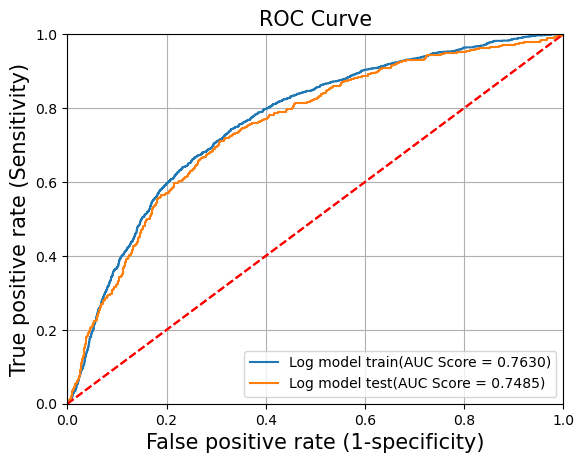

In [22]:
plot_ROC(log_model,X_train,y_train,'Log model train')
plot_ROC(log_model,X_test,y_test,'Log model test')

- An AUC (Area Under the Curve) score of 0.76 on the training data and 0.74 on the test data suggests that the logistic regression model is performing reasonably well in terms of discrimination between the positive and negative classes.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Obtain the optimal value of cut-off probability for the full model using the Youden's index 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
fpr,tpr,thresh = roc_curve(y_test,y_pred_prob)
youdens_table = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thresh})
youdens_table['difference']=youdens_table.TPR - youdens_table.FPR
youdens_table=youdens_table.sort_values('difference', ascending=False).reset_index(drop=True)
print('From Youdens table optimal value of cut-off probability for the full model is:',youdens_table.iloc[0,2])
youdens_table.head()


From Youdens table optimal value of cut-off probability for the full model is: 0.19049900202898715


,TPR,FPR,Threshold,difference
0,0.711893,0.309794,0.190499,0.402099
1,0.710218,0.308533,0.191212,0.401685
2,0.718593,0.316940,0.188550,0.401653
3,0.708543,0.307692,0.191804,0.400850
4,0.706868,0.306431,0.191991,0.400436


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Consider the cut-off probability obtained from Youden's index for the full model and calculate the following measures:<br>
                    a. f-1 score <br>
                    b. Accuracy<br>
                    c. Kappa Score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:

y_test6=[1 if i >  0.190499 else 0 for i in y_pred_prob]
print(classification_report(y_test,y_test6),'\n')
print('f1 score is:',0.48)
print('Accuracy is:',0.69)
print('Kappa score is:', cohen_kappa_score(y_test,y_test6))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      2379
           1       0.37      0.71      0.48       597

    accuracy                           0.69      2976
   macro avg       0.64      0.70      0.63      2976
weighted avg       0.80      0.69      0.72      2976
 

f1 score is: 0.48
Accuracy is: 0.69
Kappa score is: 0.29687192970965004


- The F1 score suggests a moderate balance between precision and recall.
- The accuracy of 0.69 indicates the overall correctness of predictions.
- The Kappa score of 0.297 provides an indication of agreement beyond chance.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Identify the variables involved in multicollinearity 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: >

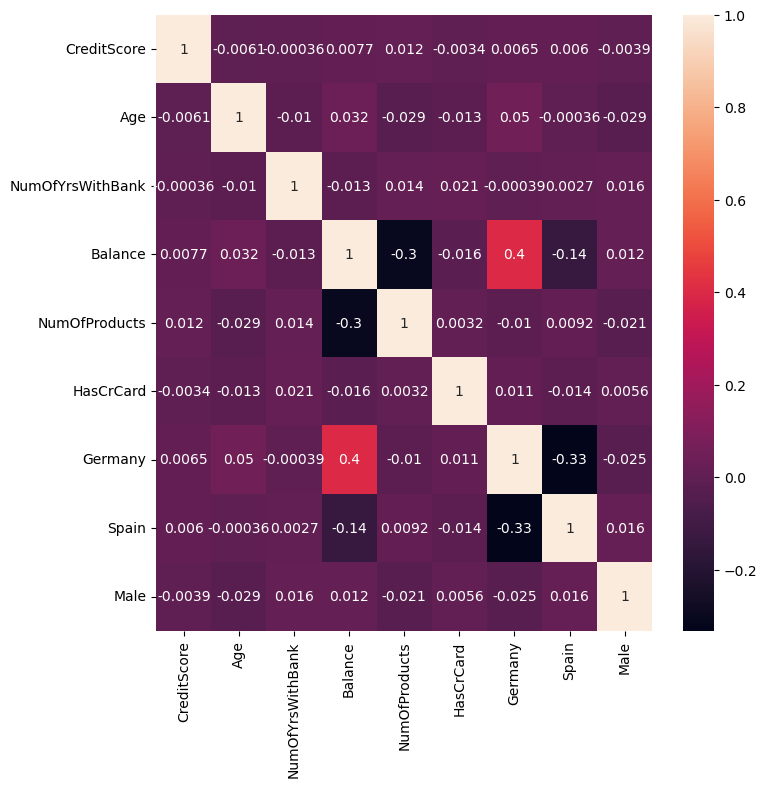

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(X.corr(),annot=True)

- from correlation matrix no multicollinearity observed.

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
Vif = [VIF(X_c.values,i) for i in range (X_c.shape[1])]
pd.DataFrame(Vif, columns=['VIF SCORE'], index=X_c.columns).sort_values('VIF SCORE', ascending=False)

,VIF SCORE
Germany,1.339241
Balance,1.336522
Spain,1.124809
NumOfProducts,1.121580
Age,1.004781
Male,1.002595
HasCrCard,1.001403
NumOfYrsWithBank,1.001064
CreditScore,1.000439
const,1.000000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a logistic regression model using the categorical variables and the variables obtained after calculating VIF. Also, plot the ROC curve and compute the AUC score (consider the cut-off probability as 0.6)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
X8 = X[['Germany','Spain','Male']]
xtrain8,xtest8,ytrain8,ytest8 = train_test_split(X8,y,random_state=100,test_size=0.3)
log8 = LogisticRegression(random_state=10)
log8_model=log8.fit(xtrain8,ytrain8)

## Full model considered after VIF calculation as no column dropped.
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=100)
log = LogisticRegression(random_state=10)
log_model_full=log.fit(X_train,y_train)

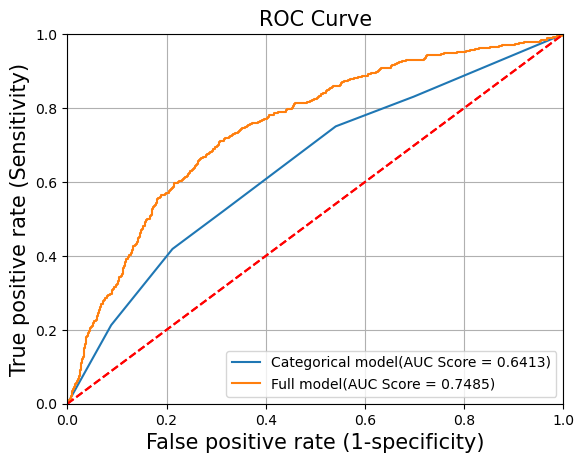

In [54]:
plot_ROC(log8_model,xtest8,ytest8,'Categorical model')
plot_ROC(log_model_full,X_test,y_test,'Full model')

- From AUC Score it is clear that full model performance is much better as compared to model built only with categorical features.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Consider the costs of false negatives and false positives as 2 and 0.5 respectively to obtain the optimal cut-off probability for which the total cost will be minimum
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
cost_fn = 2 
cost_fp = 0.5  

y_pred_prob = log_model_full.predict_proba(X_test)[:, 1]

thresholds = np.arange(0, 1.01, 0.01)
total_costs = []

for thresh in thresholds:
    y_pred_ = [1 if i >= thresh else 0 for i in y_pred_prob]
    cm = confusion_matrix(y_test, y_pred_)
    FN = cm[1][0]
    FP= cm[0][1]
    total_cost = (cost_fn * FN) + (cost_fp * FP)
    total_costs.append(total_cost)

optimal_threshold = thresholds[np.argmin(total_costs)]
min_total_cost = min(total_costs)

print("Optimal Cutoff Probability:", optimal_threshold)
print("Minimum Total Cost:", min_total_cost)

Optimal Cutoff Probability: 0.19
Minimum Total Cost: 715.5


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full logistic model using the optimal cut-off probability obtained in Q9. Also, plot the confusion matrix and ROC curve along with the AUC score  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

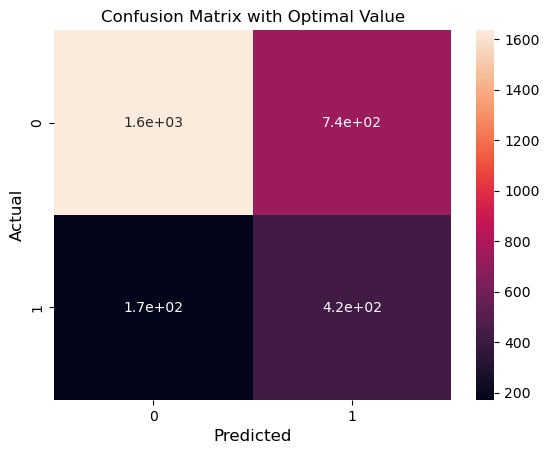

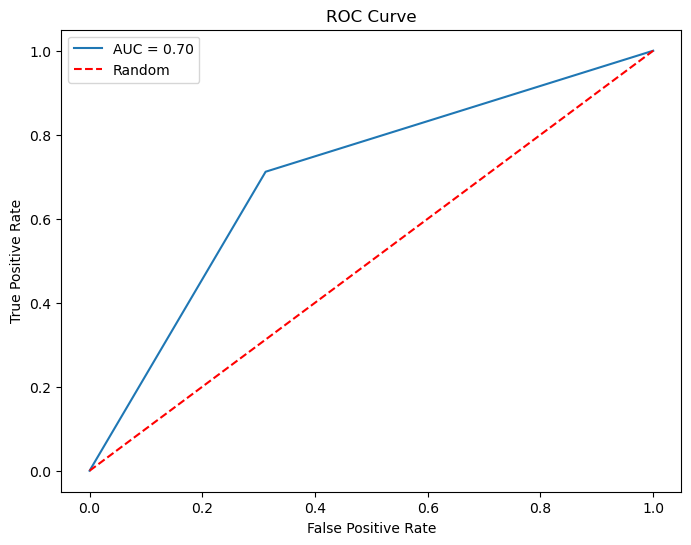

In [55]:
y_pred_10 = [1 if i > 0.19 else 0 for i in y_pred_prob]
cm = confusion_matrix(y_test,y_pred_10)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted',fontsize=12)
plt.ylabel('Actual',fontsize=12)
plt.title('Confusion Matrix with Optimal Value')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_10)
auc_score = roc_auc_score(y_test, y_pred_10)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()